In [1]:
%load_ext autoreload
%autoreload 2
%cd /code

/code


In [2]:
import tensorflow as tf

GPU_MEMORY = 7500

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=GPU_MEMORY)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
from pathlib import Path
from pprint import pprint
from typing import Dict

import fiona

from ipypb import irange, track

from matplotlib import pyplot as plt

import numpy as np

import rasterio
from rasterio.io import MemoryFile
from rasterio.mask import mask
from rasterio.plot import show

from shapely.geometry import MultiPolygon, Polygon, mapping, shape

import tensorflow as tf

from remsen.data import Dataset

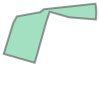

In [4]:
from remsen.data import Dataset

dataset = Dataset(
    buildings_path=Path("/code/data/building.gpkg"),
    cadastre_path=Path("/code/data/cadastre.gpkg"),
    lidar_path=Path("/code/data/lidar.vrt"),
)

dataset.cadastre(43900)

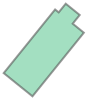

In [5]:
dataset.building(10)

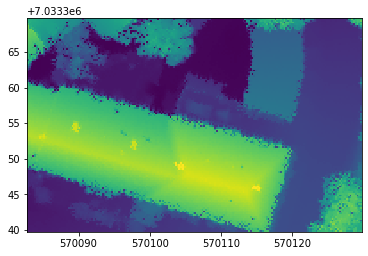

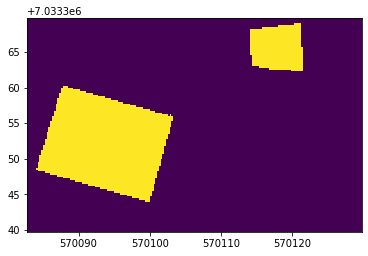

In [6]:
cropped_file, building_file = dataset.construct_observation(43900)
with cropped_file.open() as f:
    show(f)
    
with building_file.open() as f:
    show(f)

 [████████████████████████████████████████████████████████████] 5/5 [00:02<00:00, 0.41s/it]

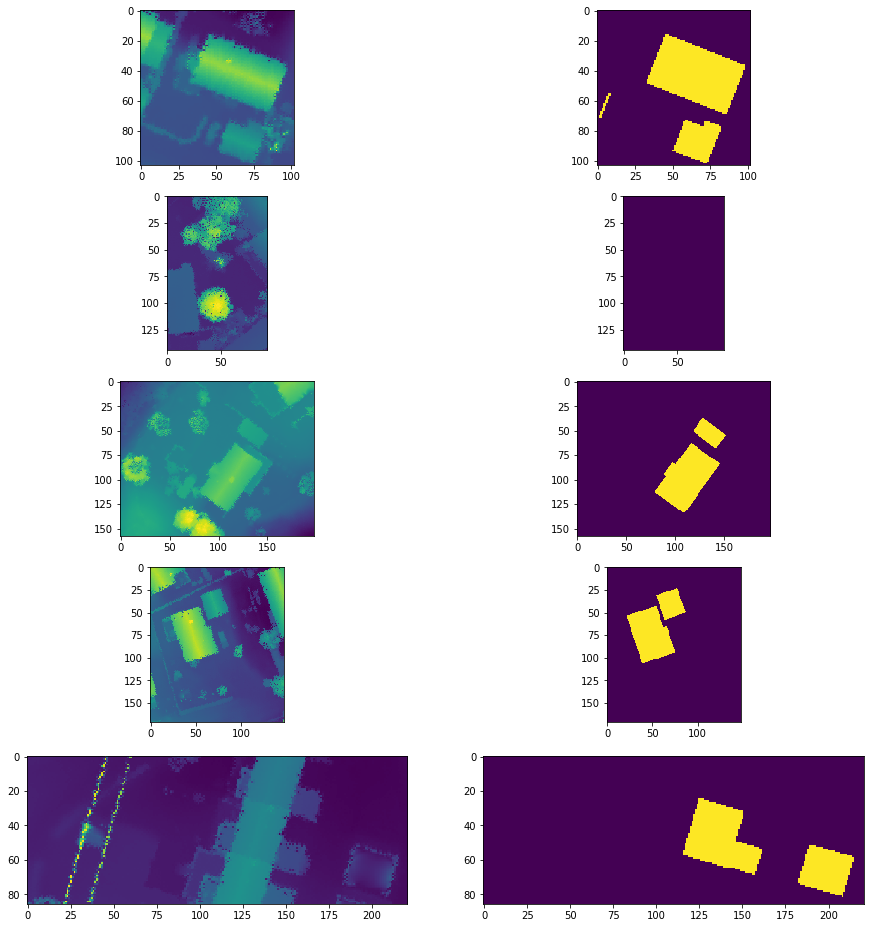

In [7]:
num_cases = 5
fig, ax = plt.subplots(num_cases, 2, figsize=(15, num_cases * 3.3))
for i in track(range(num_cases)):
    cadastre, buildings = dataset.construct_observation(cadastre=i)
    cadastre_data = cadastre.open().read(1)
    vmin = cadastre_data[cadastre_data != cadastre.open().nodata].min()
    ax[i, 0].imshow(cadastre_data, vmin=vmin, vmax=cadastre_data.max())
    ax[i, 1].imshow(buildings.open().read(1))
fig.show()

 [████████████████████████████████████████████████████████████] 2/2 [00:01<00:00, 0.39s/it]

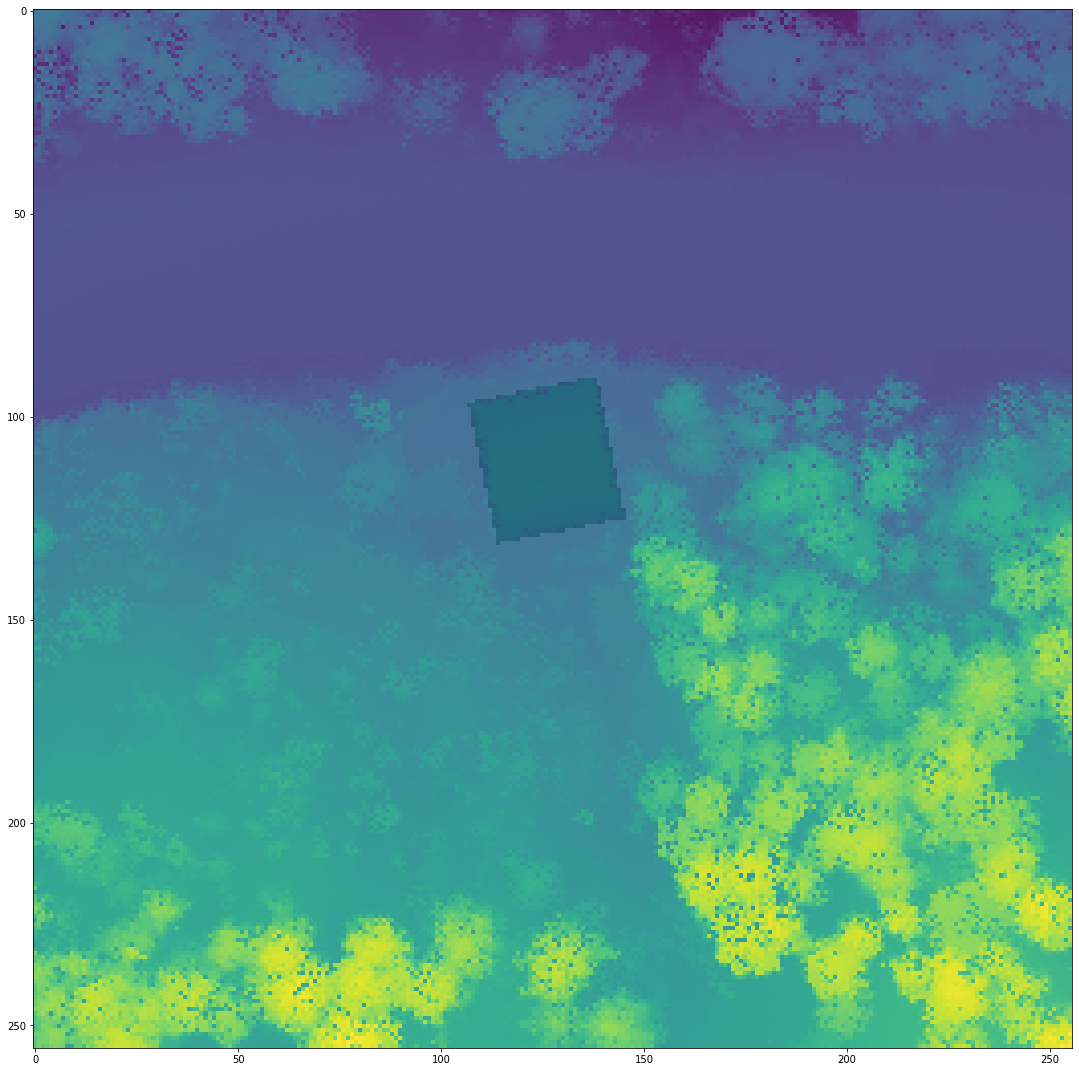

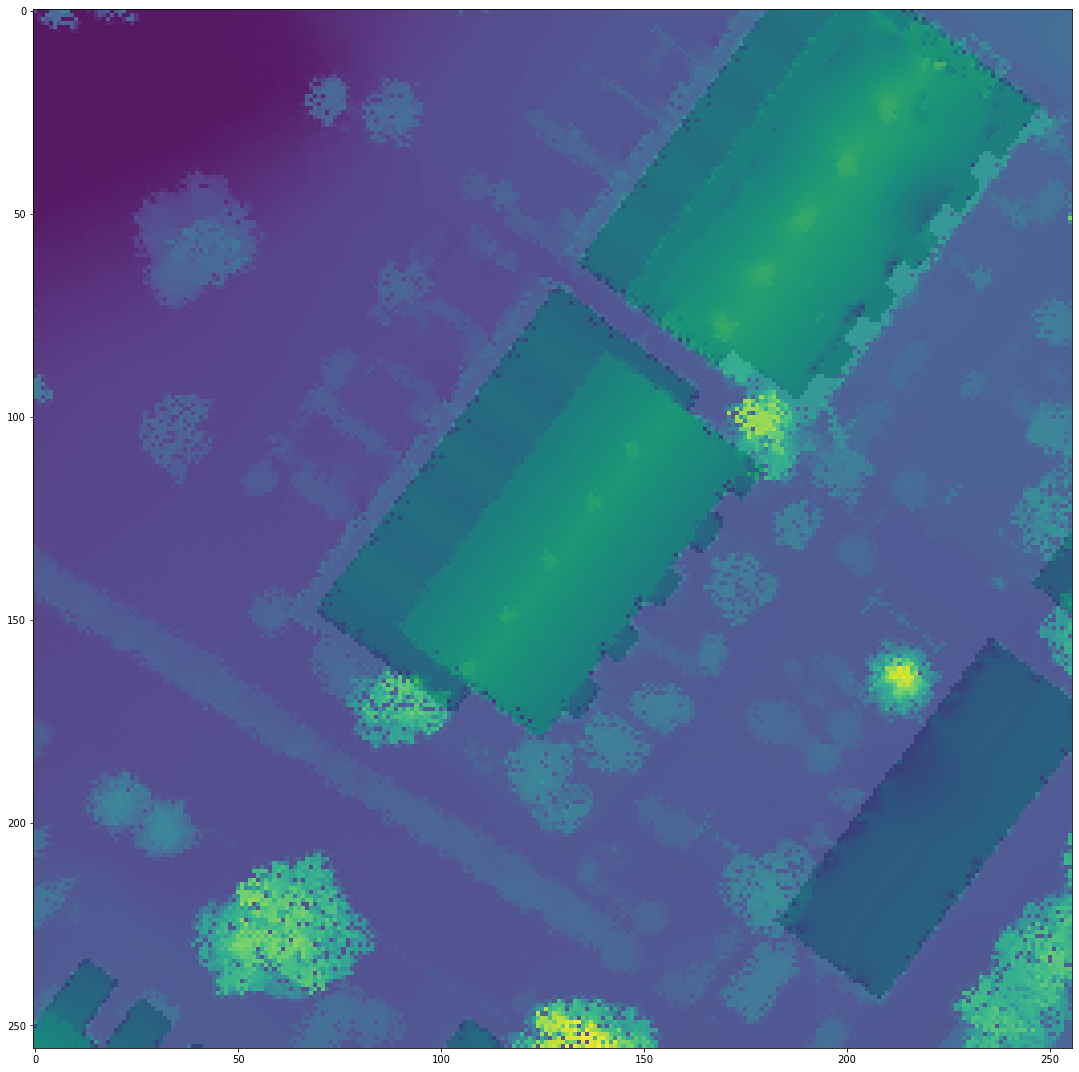

In [8]:
for x in irange(247, 249):
    dataset.plot_tiles(x)

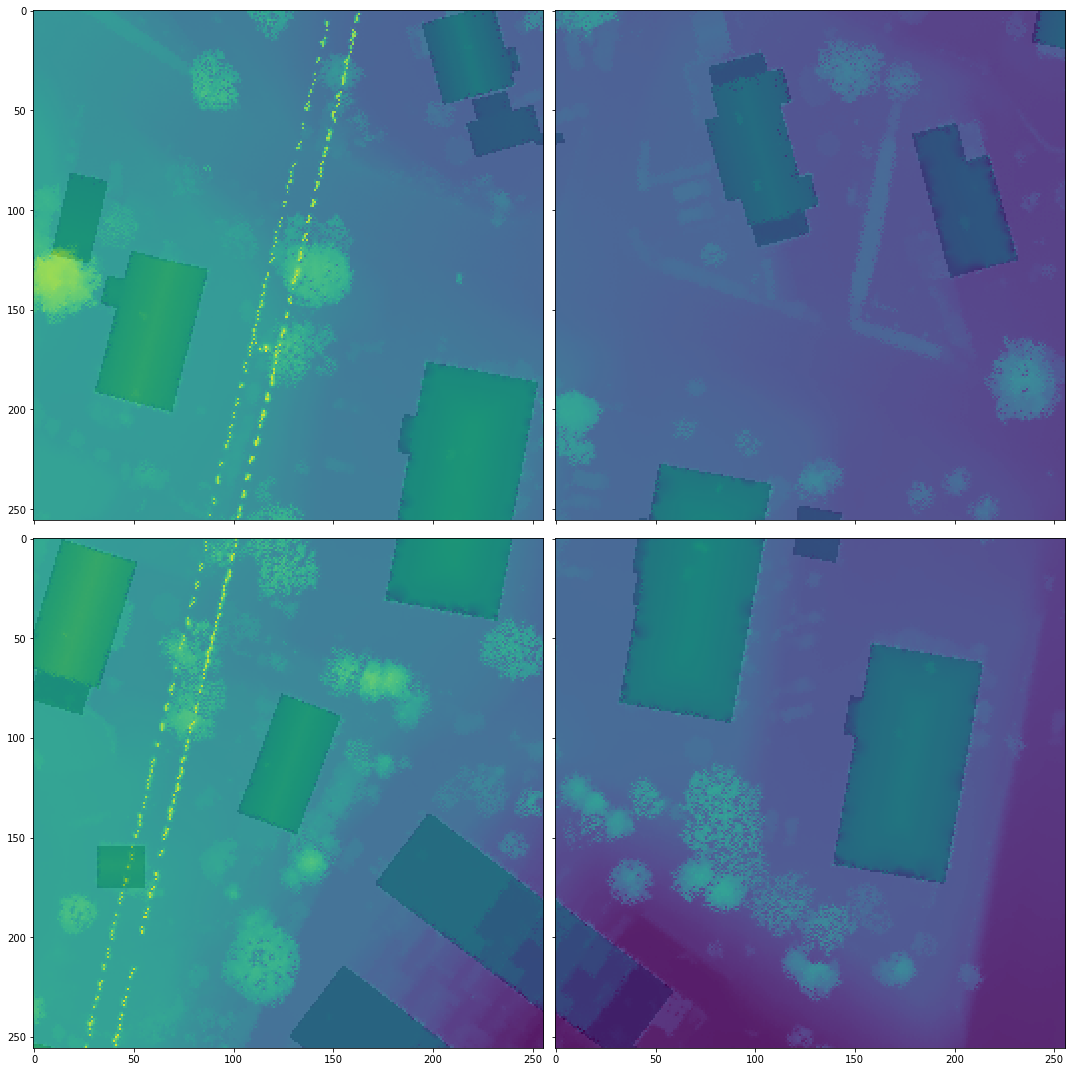

In [9]:
dataset.plot_tiles(250)

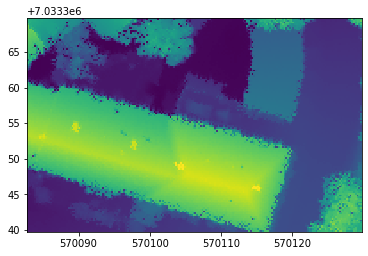

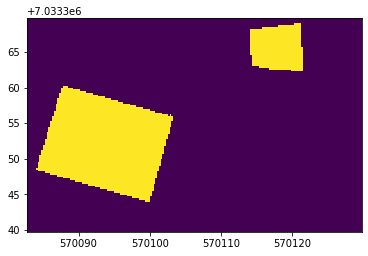

In [10]:
cropped_file, building_file = dataset.construct_observation(43900)
with cropped_file.open() as f:
    show(f)
    
with building_file.open() as f:
    show(f)

In [ ]:
from notebooks.unet import model

In [31]:
tf_dataset = (
    tf
    .data
    .Dataset
    .from_tensor_slices(dataset[0:3])
    .repeat(count=2)
    .batch(batch_size=32, drop_remainder=True)
    .prefetch(buffer_size=32)
    .take(count=32)
)

 [████████████████████████████████████████████████████████████] 3/3 [00:01<00:00, 0.38s/it]

In [ ]:
model.fit(tf_dataset, verbose=3000)

In [ ]:
images, masks = dataset[0:3]
model.fit(x=images, y=masks)